# Data Preprocessing

Data cleansing and preparation -

This crucial phase involves thorough data cleansing and preparation, ensuring accuracy and consistency. By meticulously organizing and refining raw data, this process lays a solid foundation for effective analysis and interpretation.

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the necessary libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Reading the Gaming Ballot data

ballot_data = pd.read_csv('/content/drive/MyDrive/ML_Assignment/Gaming Ballot Data Set-1.csv')

ballot_data

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,"$15,607","$34,618",...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,"$13,740","$23,114",...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,"$24,187","$44,874",...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,"$12,816","$27,359",...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,"$19,017","$23,054",...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,18,41,44069,27316,71385,1,1,354527,"$18,893","$27,622",...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1282,18,42,10026,9755,19781,1,1,53029,"$20,082","$33,810",...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1283,18,43,126397,76905,203302,1,1,732143,"$28,711","$49,763",...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1284,18,44,26412,23464,49876,1,1,153293,"$25,791","$38,751",...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


In [ ]:
#displaying the number of rows and columns in the gaming ballot dataset

ballot_data.shape

(1286, 31)

In [ ]:
#displaying the first 5 rows of the gaming ballot dataset

ballot_data.head()

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,"$15,607","$34,618",...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,"$13,740","$23,114",...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,"$24,187","$44,874",...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,"$12,816","$27,359",...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,"$19,017","$23,054",...,1.0,1192,220,1231,973,940,2,0.07,1913,2462


In [ ]:
ballot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State No                              1286 non-null   int64  
 1   County No                             1286 non-null   int64  
 2   FOR                                   1286 non-null   int64  
 3   AGAINST                               1286 non-null   int64  
 4   TOTAL CASTE                           1286 non-null   int64  
 5   DEPENDENT VARIABLE                    1286 non-null   int64  
 6   BALLOT TYPE                           1286 non-null   int64  
 7   POPULATION                            1286 non-null   int64  
 8   PCI                                   1286 non-null   object 
 9   MEDIUM FAMILY INCOME                  1286 non-null   object 
 10  SIZE OF COUNTY                        1286 non-null   float64
 11  POPULATION DENSIT

In [ ]:
# Examine missing values

ballot_data.isnull().sum()

State No                                0
County No                               0
FOR                                     0
AGAINST                                 0
TOTAL CASTE                             0
DEPENDENT VARIABLE                      0
BALLOT TYPE                             0
POPULATION                              0
PCI                                     0
MEDIUM FAMILY INCOME                    0
SIZE OF COUNTY                          0
POPULATION DENSITY                      0
PERCENT WHITE                           0
PERCENT BLACK                           0
PERCENT OTHER                           0
PERCENT MALE                            0
PERCENT FEMALE                          0
NO OF CHURCHES                          0
NO OF CHURCH MEMBERS                    0
PERCENT CHURCH MEMBERS OF POPULATION    0
POVERTY LEVEL                           0
UNEMPLOYMENT RATE                       0
AGE LESS THAN 18                        0
AGE24                             

Two columns - **PCI** AND **MEDIUM FAMILY INCOME** are of object datatypes due to the presence of '$' and ' , '. We will be removing it and converting it into integer datatype.

In [ ]:
ballot_data.dtypes     #examining the data types of all columns in the dataset

State No                                  int64
County No                                 int64
FOR                                       int64
AGAINST                                   int64
TOTAL CASTE                               int64
DEPENDENT VARIABLE                        int64
BALLOT TYPE                               int64
POPULATION                                int64
PCI                                      object
MEDIUM FAMILY INCOME                     object
SIZE OF COUNTY                          float64
POPULATION DENSITY                      float64
PERCENT WHITE                           float64
PERCENT BLACK                           float64
PERCENT OTHER                           float64
PERCENT MALE                            float64
PERCENT FEMALE                          float64
NO OF CHURCHES                            int64
NO OF CHURCH MEMBERS                      int64
PERCENT CHURCH MEMBERS OF POPULATION    float64
POVERTY LEVEL                           

In [ ]:
# Changing the data type from object to int, and removing characters such as dollar sign $ and comma ,

ballot_data['PCI'] = ballot_data['PCI'].str.replace("$", "").str.replace(",", "").astype(int)

ballot_data['MEDIUM FAMILY INCOME'] = ballot_data['MEDIUM FAMILY INCOME'].str.replace("$", "").str.replace(",", "").astype(int)

<ipython-input-1218-f559bae88717>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ballot_data['PCI'] = ballot_data['PCI'].str.replace("$", "").str.replace(",", "").astype(int)
<ipython-input-1218-f559bae88717>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ballot_data['MEDIUM FAMILY INCOME'] = ballot_data['MEDIUM FAMILY INCOME'].str.replace("$", "").str.replace(",", "").astype(int)


In [ ]:
ballot_data.dtypes   #PCI and MEDIUM FAMILY INCOME has changed to integer datatypes

State No                                  int64
County No                                 int64
FOR                                       int64
AGAINST                                   int64
TOTAL CASTE                               int64
DEPENDENT VARIABLE                        int64
BALLOT TYPE                               int64
POPULATION                                int64
PCI                                       int64
MEDIUM FAMILY INCOME                      int64
SIZE OF COUNTY                          float64
POPULATION DENSITY                      float64
PERCENT WHITE                           float64
PERCENT BLACK                           float64
PERCENT OTHER                           float64
PERCENT MALE                            float64
PERCENT FEMALE                          float64
NO OF CHURCHES                            int64
NO OF CHURCH MEMBERS                      int64
PERCENT CHURCH MEMBERS OF POPULATION    float64
POVERTY LEVEL                           

In [ ]:
#showcasing the number data types

ballot_data.select_dtypes(include = ['number'])

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,15607,34618,...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,13740,23114,...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,24187,44874,...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,12816,27359,...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,19017,23054,...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,18,41,44069,27316,71385,1,1,354527,18893,27622,...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1282,18,42,10026,9755,19781,1,1,53029,20082,33810,...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1283,18,43,126397,76905,203302,1,1,732143,28711,49763,...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1284,18,44,26412,23464,49876,1,1,153293,25791,38751,...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


**There are no object data types available now in the dataset.**

In [ ]:
ballot_data.select_dtypes(include = ['object'])   #displaying the object datatypes

""
0
1
2
3
4
...
1281
1282
1283
1284


**There is no categorical values present in the model.**

In [ ]:
# List of categorical variables

categorical_columns = [column for column in ballot_data.keys() if ballot_data[column].dtype.name == 'object']
categorical_columns

[]

# Data Visualization of Numerical Values

**This Countplot shows the total number/count of YES and NO Votes across all states and counties**

Text(0.5, 1.0, 'Countplot of Ballot Gaming Type - Dependent variable')

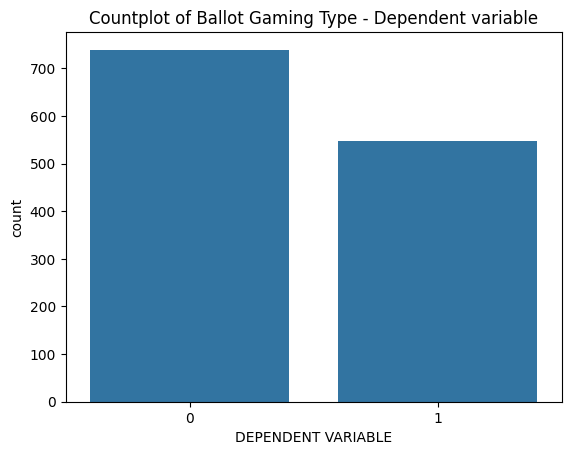

In [ ]:
# Plot a categorical variable: Dependent Variables - 0 and 1

snsplot = sns.countplot(x='DEPENDENT VARIABLE', data=ballot_data)
snsplot.set_title("Countplot of Ballot Gaming Type - Dependent variable")

**Describing the count of older people in each particular state and county**

In [ ]:
ballot_data['POPULATION DENSITY'].describe()

count    1286.000000
mean       81.636695
std       221.833216
min         0.360000
25%         7.040000
50%        22.600000
75%        64.937500
max      3404.480000
Name: POPULATION DENSITY, dtype: float64

In [ ]:
ballot_data['POPULATION DENSITY'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1286 entries, 0 to 1285
Series name: POPULATION DENSITY
Non-Null Count  Dtype  
--------------  -----  
1286 non-null   float64
dtypes: float64(1)
memory usage: 10.2 KB


In [ ]:
ballot_data['POPULATION DENSITY'].max()

3404.48

In [ ]:
# Obtain the variance, standard deviation, and range of a numeric varaible: No. of Older

print("variance: ", ballot_data['POPULATION DENSITY'].var(), "standard deviation: ", ballot_data['POPULATION DENSITY'].std(), "range: ", ballot_data['POPULATION DENSITY'].min(), ballot_data['NO OF OLDER'].max())

variance:  49209.97566198795 standard deviation:  221.83321586720945 range:  0.36 324468


In [ ]:
IQR = ballot_data['POPULATION DENSITY'].quantile(0.75) - ballot_data['POPULATION DENSITY'].quantile(0.25)
print("IQR:", IQR)

IQR: 57.8975


This boxplot shows the spread of the data of the PCI.

Text(0.5, 1.0, 'Boxplot of PCI in the Gaming Ballot data set')

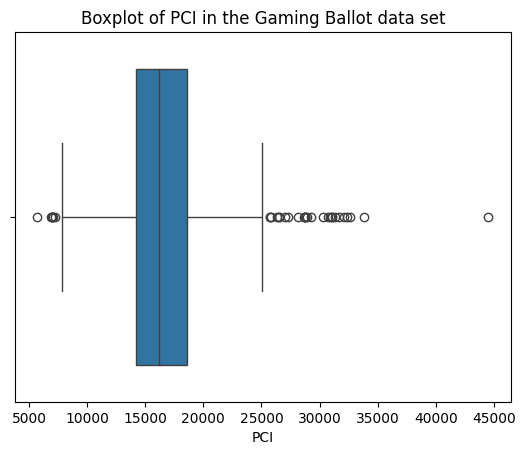

In [ ]:
# Boxplot of a numeric variable 'PCI'

snsplot = sns.boxplot(x='PCI', data = ballot_data)
snsplot.set_title("Boxplot of PCI in the Gaming Ballot data set")

This boxplot shows the spread of the data of the medium family income.

Text(0.5, 1.0, 'Boxplot of PCI in the Gaming Ballot data set')

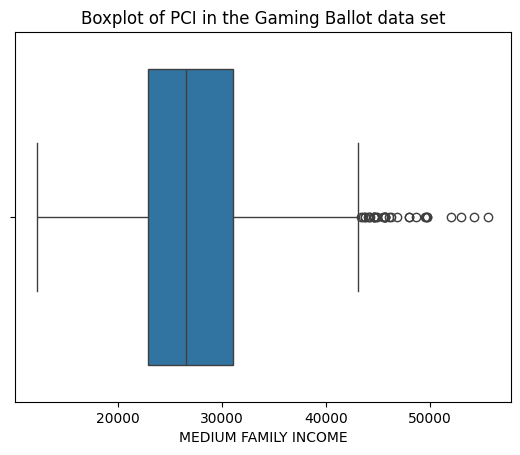

In [ ]:
# Boxplot of a numeric variable 'MEDIUM FAMILY INCOME'

snsplot = sns.boxplot(x='MEDIUM FAMILY INCOME', data = ballot_data)
snsplot.set_title("Boxplot of PCI in the Gaming Ballot data set")

This boxplot shows the spread of the data of the number of older people.

Text(0.5, 1.0, 'Boxplot of No. of Older in the Gaming Ballot data set')

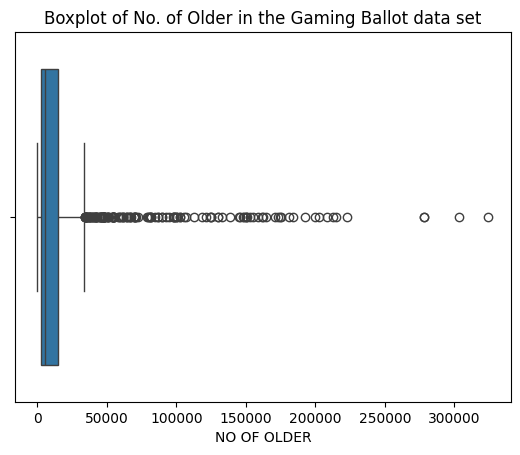

In [ ]:
# Boxplot of a numeric variable 'Number of Older'

snsplot = sns.boxplot(x='NO OF OLDER', data = ballot_data)
snsplot.set_title("Boxplot of No. of Older in the Gaming Ballot data set")

The histogram displays the count of unemployment rate across the whole dataset.

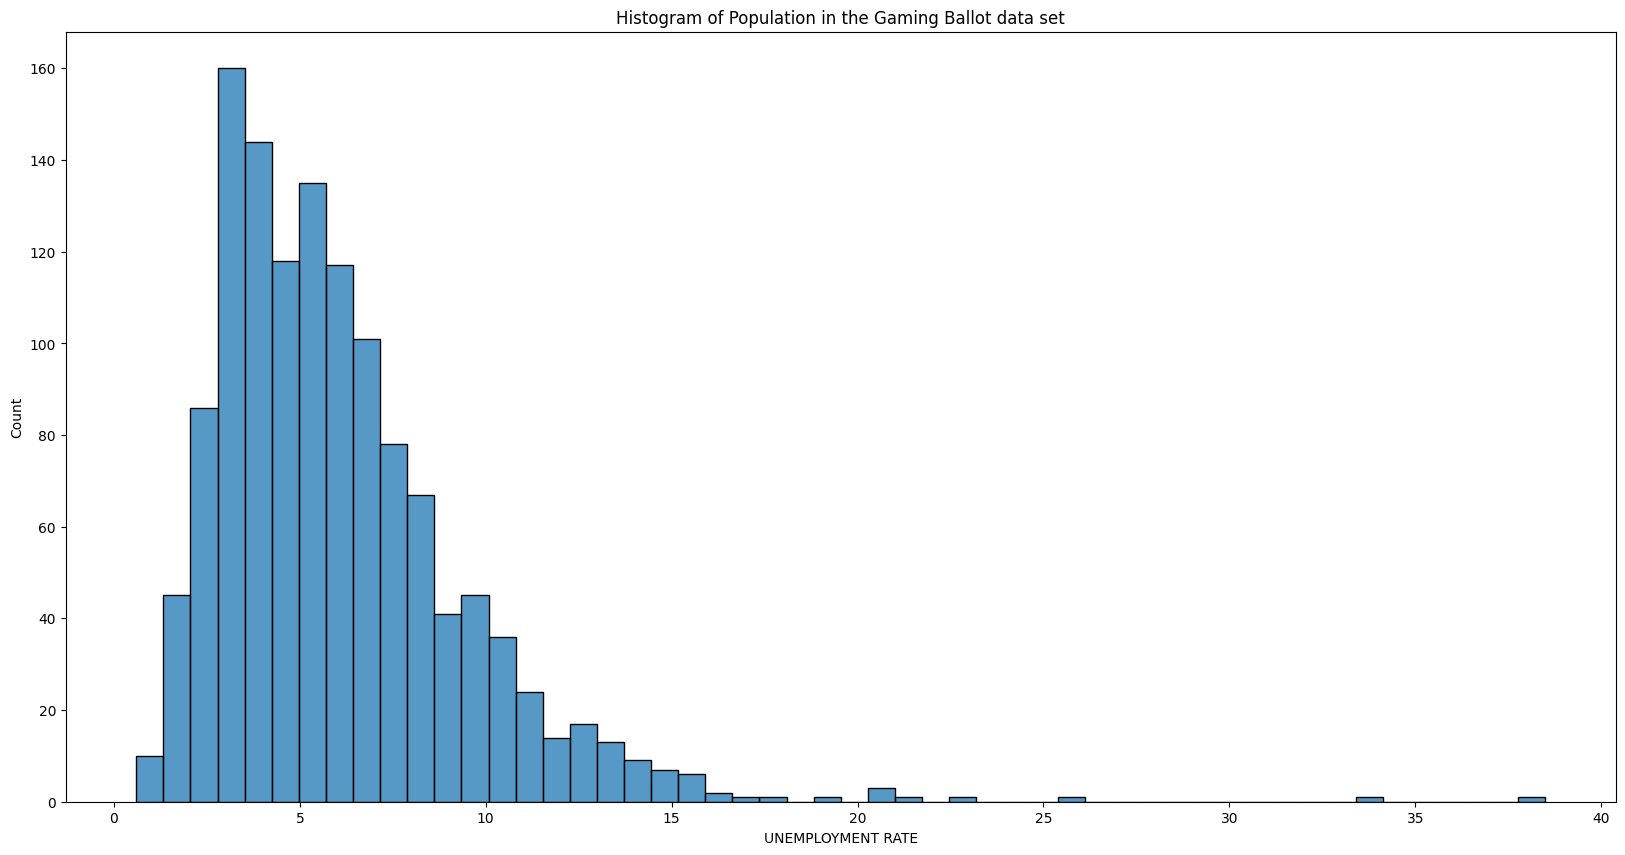

In [ ]:
# Histogram of Unemployment rate

plt.figure(figsize=(20, 10))

snsplot = sns.histplot(x='UNEMPLOYMENT RATE', data = ballot_data)
snsplot.set_title("Histogram of Population in the Gaming Ballot data set")

plt.show()

This scatterplot shows the number of female percentage against dependent variable 0 and 1.

Text(0.5, 1.0, 'Scatterplot of Percent Church Members of Population and Ballot Type')

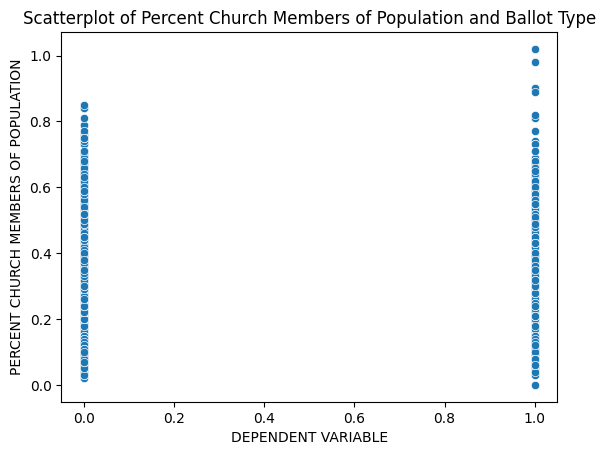

In [ ]:
# scatter plot two numeric variables: Dependent Variable and Percent Church Members of population

snsplot = sns.scatterplot(x='DEPENDENT VARIABLE', y= 'PERCENT CHURCH MEMBERS OF POPULATION', data=ballot_data)
snsplot.set_title("Scatterplot of Percent Church Members of Population and Ballot Type")

This scatterplot shows the Population Density against dependent variable 0 and 1.

Text(0.5, 1.0, 'Scatterplot of Population Density and Ballot Type')

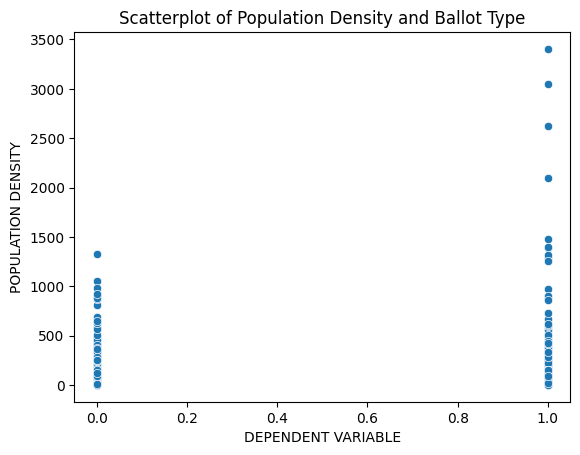

In [ ]:
# scatter plot two numeric variables: Dependent Variable and Population Density

snsplot = sns.scatterplot(x='DEPENDENT VARIABLE', y= 'POPULATION DENSITY', data=ballot_data)
snsplot.set_title("Scatterplot of Population Density and Ballot Type")

This scatterplot shows the number of Male percentage against dependent variable 0 and 1.


Text(0.5, 1.0, 'Scatterplot of Percent Male and Ballot Type')

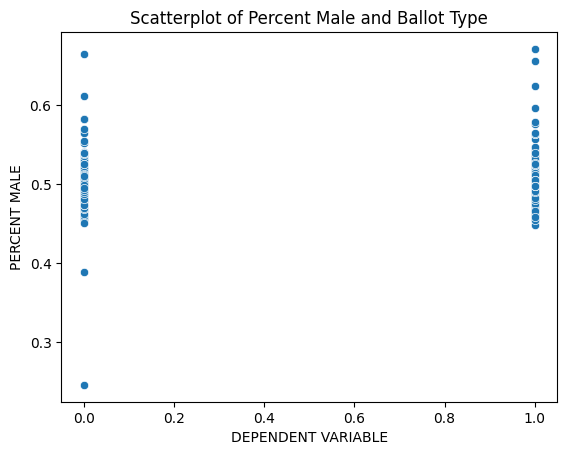

In [ ]:
# scatter plot two numeric variables: Dependent Variable and Percent Male

snsplot = sns.scatterplot(x='DEPENDENT VARIABLE', y= 'PERCENT MALE', data=ballot_data)
snsplot.set_title("Scatterplot of Percent Male and Ballot Type")

This scatterplot shows the number of female percentage against dependent variable 0 and 1.


Text(0.5, 1.0, 'Scatterplot of Percent Female and Ballot Type')

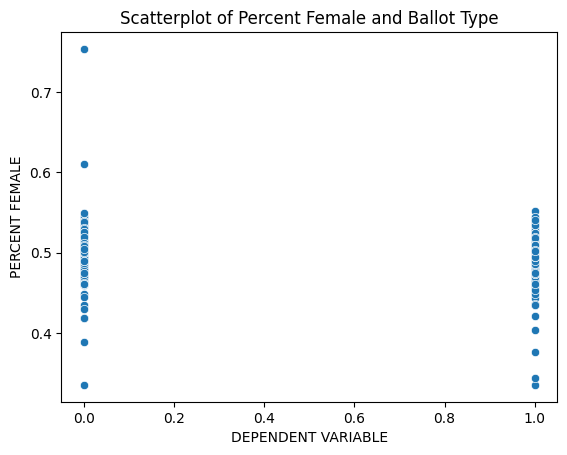

In [ ]:
# scatter plot two numeric variables: Dependent Variable and Percent Female

snsplot = sns.scatterplot(x='DEPENDENT VARIABLE', y= 'PERCENT FEMALE', data=ballot_data)
snsplot.set_title("Scatterplot of Percent Female and Ballot Type")

# Understanding relationships of Multiple variables

**Constructing a heatmap enhances data comprehension by visually representing correlations or patterns in a dataset. This graphical tool is particularly effective for revealing relationships between variables, aiding in exploratory data analysis. Utilizing color gradients, it simplifies the identification of trends or clusters within the data, facilitating insights for further analysis.**

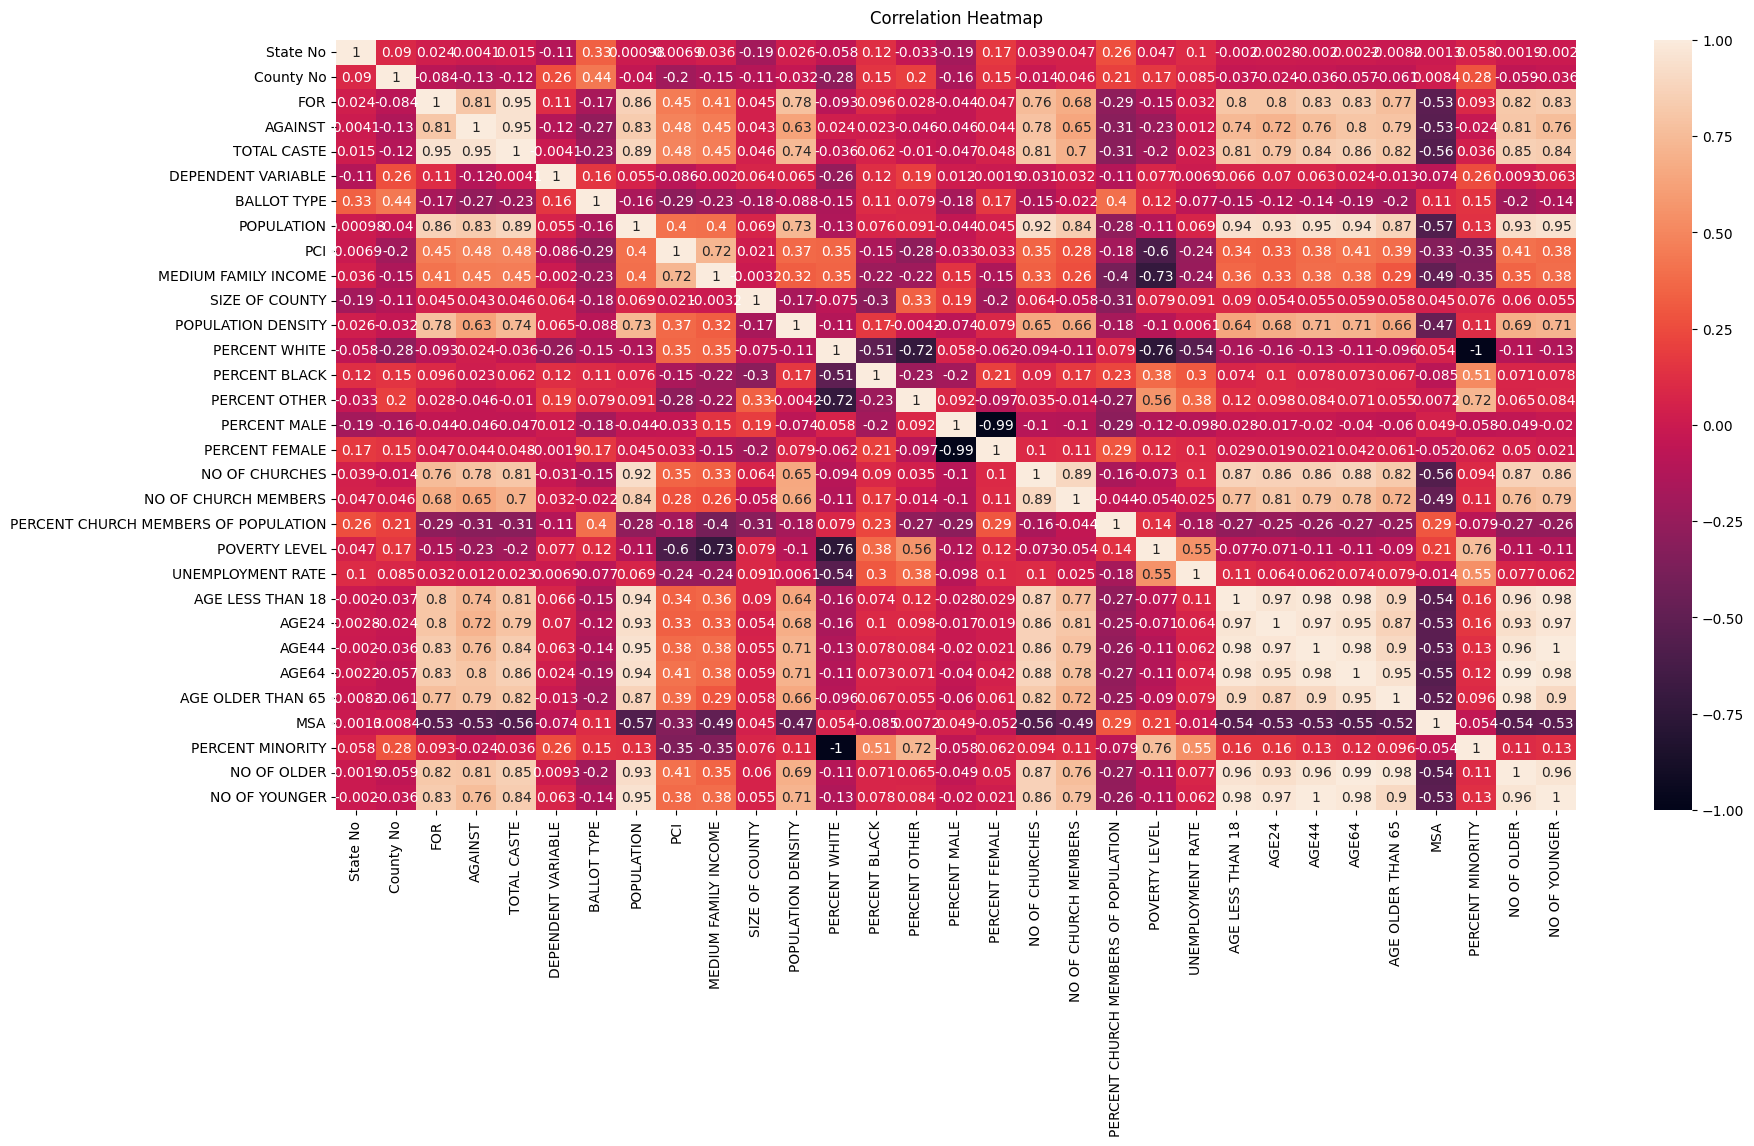

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(ballot_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
ballot_data.corr()

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
State No,1.000000,0.090389,0.024048,0.004069,0.014652,-0.109403,0.334559,0.000978,-0.006883,0.035653,...,0.101994,-0.001958,0.002815,-0.001997,0.002246,-0.008244,-0.001293,0.057918,-0.001889,-0.001997
County No,0.090389,1.000000,-0.084419,-0.134762,-0.115416,0.264187,0.436626,-0.039672,-0.202848,-0.147092,...,0.084907,-0.036720,-0.023888,-0.036491,-0.056928,-0.060713,0.008410,0.283185,-0.059109,-0.036491
FOR,0.024048,-0.084419,1.000000,0.812408,0.950845,0.109862,-0.169088,0.864440,0.446137,0.413764,...,0.032309,0.797472,0.796949,0.834095,0.831227,0.766240,-0.527078,0.092805,0.815367,0.834095
AGAINST,0.004069,-0.134762,0.812408,1.000000,0.953038,-0.115229,-0.266107,0.829106,0.476721,0.451722,...,0.011551,0.739565,0.717441,0.762922,0.804353,0.793142,-0.533762,-0.023810,0.809506,0.762922
TOTAL CASTE,0.014652,-0.115416,0.950845,0.953038,1.000000,-0.004135,-0.229147,0.889304,0.484897,0.454806,...,0.022915,0.806968,0.794947,0.838394,0.858908,0.819200,-0.557230,0.035557,0.853407,0.838394
DEPENDENT VARIABLE,-0.109403,0.264187,0.109862,-0.115229,-0.004135,1.000000,0.162675,0.055455,-0.086420,-0.002025,...,0.006931,0.065751,0.069783,0.062848,0.023617,-0.013062,-0.074132,0.257781,0.009348,0.062848
BALLOT TYPE,0.334559,0.436626,-0.169088,-0.266107,-0.229147,0.162675,1.000000,-0.158555,-0.292027,-0.231650,...,-0.077277,-0.151295,-0.122107,-0.144200,-0.190382,-0.204203,0.110660,0.148186,-0.198137,-0.144200
POPULATION,0.000978,-0.039672,0.864440,0.829106,0.889304,0.055455,-0.158555,1.000000,0.399023,0.395105,...,0.068878,0.944550,0.934754,0.946163,0.943299,0.871969,-0.574396,0.134705,0.926260,0.946163
PCI,-0.006883,-0.202848,0.446137,0.476721,0.484897,-0.086420,-0.292027,0.399023,1.000000,0.720942,...,-0.244005,0.343281,0.329794,0.377785,0.408153,0.388806,-0.331388,-0.353150,0.405349,0.377785
MEDIUM FAMILY INCOME,0.035653,-0.147092,0.413764,0.451722,0.454806,-0.002025,-0.231650,0.395105,0.720942,1.000000,...,-0.239561,0.360813,0.332021,0.383879,0.382038,0.292955,-0.492467,-0.346204,0.351257,0.383879


# Model Development - Building a Decision Tree

In [ ]:
ballot_data.keys()

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')

In [ ]:
#choosing the prediction variables and target variable

predictors=ballot_data[[ 'FOR', 'AGAINST', 'TOTAL CASTE', 'BALLOT TYPE', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE',  'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER']]
target=ballot_data['DEPENDENT VARIABLE']

In [ ]:
#splitting the data in 70-30

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(900, 18) (386, 18) (900,) (386,)


In [ ]:
ballot_data['DEPENDENT VARIABLE'].value_counts()

0    739
1    547
Name: DEPENDENT VARIABLE, dtype: int64

In [ ]:
# Examine the porportion of target variable for data set

print(target.value_counts(normalize=True))

0    0.57465
1    0.42535
Name: DEPENDENT VARIABLE, dtype: float64


In [ ]:
# Build a decision tree model on training data with max_depth = 5

decision_model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
decision_model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.4625, 0.9166666666666666, 'AGAINST <= 823.5\nentropy = 0.978\nsamples = 900\nvalue = [529, 371]\nclass = No'),
 Text(0.3, 0.75, 'FOR <= 689.0\nentropy = 0.911\nsamples = 184\nvalue = [60, 124]\nclass = Yes'),
 Text(0.25, 0.5833333333333334, 'AGAINST <= 564.0\nentropy = 1.0\nsamples = 120\nvalue = [60, 60]\nclass = No'),
 Text(0.2, 0.4166666666666667, 'FOR <= 386.5\nentropy = 0.932\nsamples = 92\nvalue = [32, 60]\nclass = Yes'),
 Text(0.1, 0.25, 'AGAINST <= 259.5\nentropy = 0.994\nsamples = 55\nvalue = [30, 25]\nclass = No'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.592\nsamples = 28\nvalue = [4, 24]\nclass = Yes'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.229\nsamples = 27\nvalue = [26, 1]\nclass = No'),
 Text(0.3, 0.25, 'PERCENT MINORITY <= 0.005\nentropy = 0.303\nsamples = 37\nvalue = [2, 35]\nclass = Yes'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.35, 0.08333333333333333, 'entropy = 0.183\nsamples = 36\nval

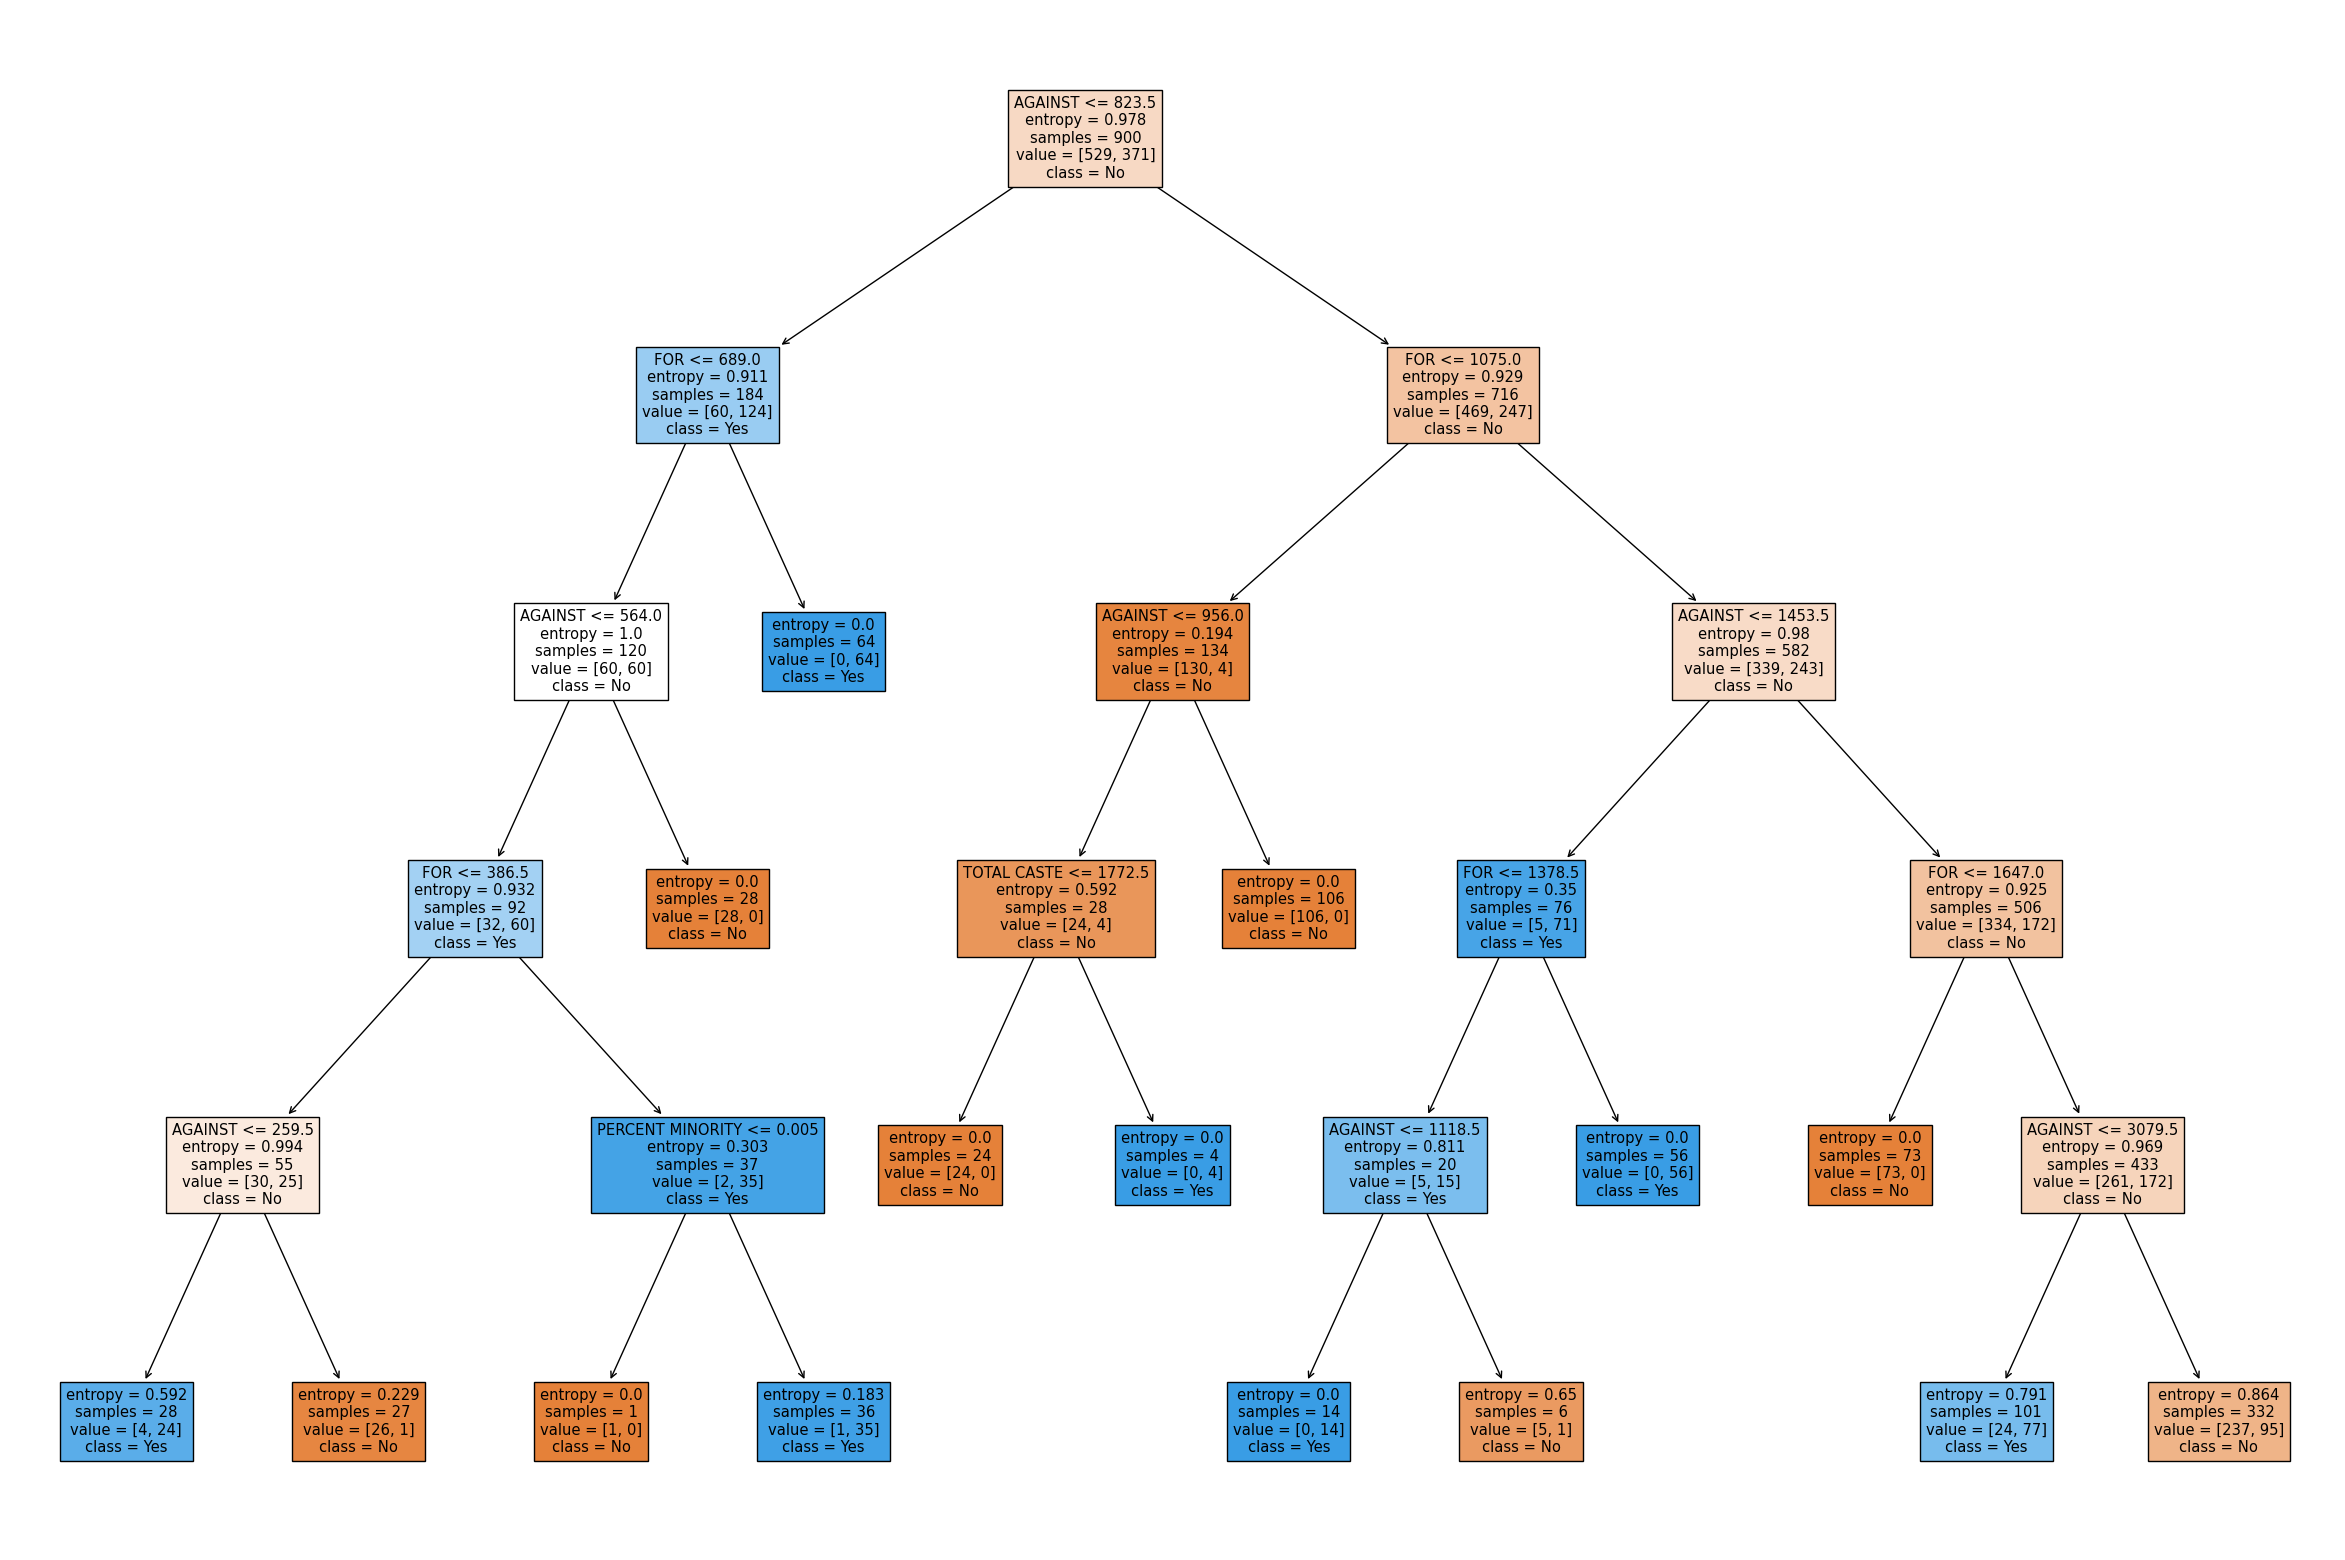

In [ ]:
# Plot the Decision tree

fig = plt.figure(figsize=(30,20))
tree.plot_tree(decision_model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Make predictions on training and testing data
prediction_on_train = decision_model.predict(predictors_train)
prediction_on_test = decision_model.predict(predictors_test)

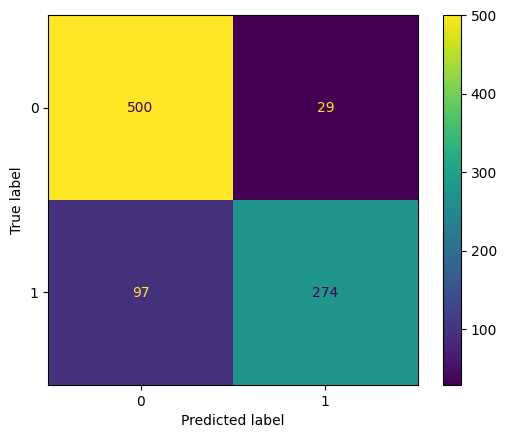

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_model.classes_).plot()

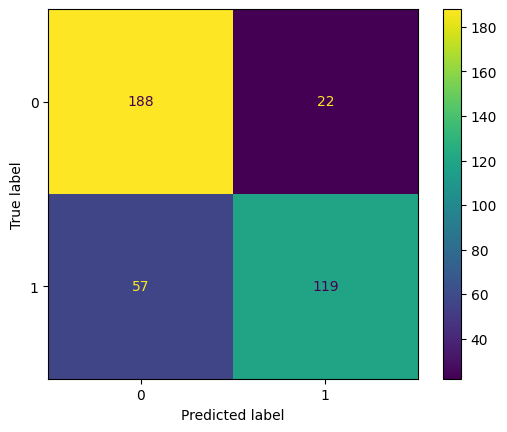

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_model.classes_).plot()

In [ ]:
# Examine the evaluation results on training and testing data: accuracy, precision, recall, and f1-score

print(classification_report(target_train, prediction_on_train))

print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89       529
           1       0.90      0.74      0.81       371

    accuracy                           0.86       900
   macro avg       0.87      0.84      0.85       900
weighted avg       0.87      0.86      0.86       900

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       210
           1       0.84      0.68      0.75       176

    accuracy                           0.80       386
   macro avg       0.81      0.79      0.79       386
weighted avg       0.80      0.80      0.79       386



# K Nearest Neighbour Model

In [ ]:
#importing KNN model

from sklearn.neighbors import KNeighborsClassifier

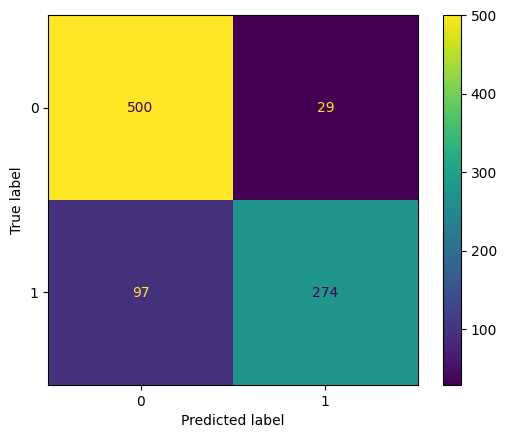

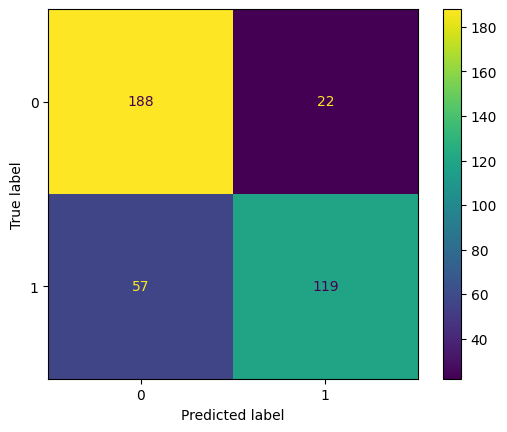

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix

cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_).plot()

cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_).plot()

Selecting the n_neighbours = 3 as it is giving the best accuracy. This number of n_neighbours is determined after manually checking with different values of it.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(predictors_train, target_train)

#Make predictions on training and testing data
prediction_on_train = knn_model.predict(predictors_train)
prediction_on_test = knn_model.predict(predictors_test)

cm = confusion_matrix(target_test, prediction_on_test)
#print(classification_report(target_test, prediction_on_test))

print(classification_report(target_train, prediction_on_train))
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       529
           1       0.91      0.88      0.90       371

    accuracy                           0.92       900
   macro avg       0.92      0.91      0.91       900
weighted avg       0.92      0.92      0.92       900

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       210
           1       0.81      0.76      0.78       176

    accuracy                           0.81       386
   macro avg       0.81      0.80      0.81       386
weighted avg       0.81      0.81      0.81       386



# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Build a Naive Bayes model on training data

model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [ ]:
# Make predictions on testing data

prediction_on_test_NB = model_NB.predict(predictors_test)

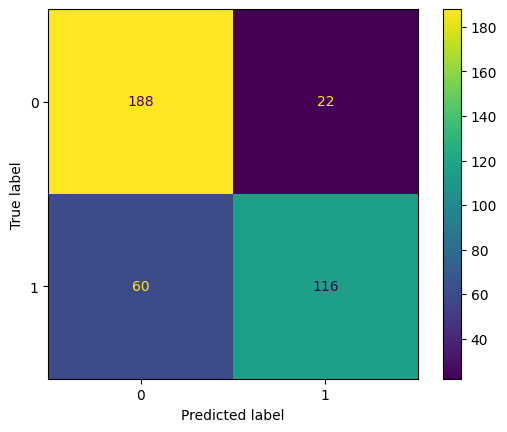

In [ ]:
# Examine the evaluation results on training data: confusion_matrix

cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

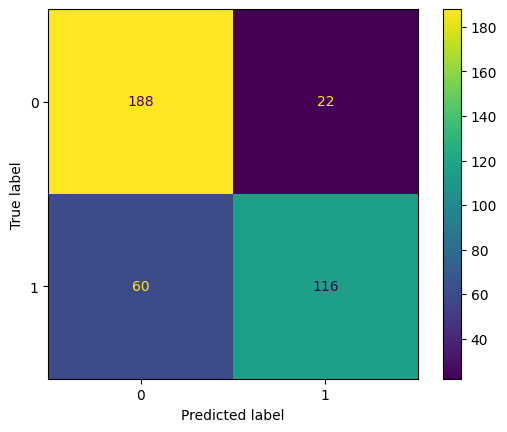

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix

cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_NB))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       210
           1       0.84      0.66      0.74       176

    accuracy                           0.79       386
   macro avg       0.80      0.78      0.78       386
weighted avg       0.80      0.79      0.78       386



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
kfold=KFold(n_splits=5, shuffle= True, random_state=42)
model=svm.SVC()
scores=cross_val_score(model, predictors, target, scoring="accuracy",cv=5)
print("Accuracy of Model with Cross Validation Scores: ",scores.mean()*100)

Accuracy of Model with Cross Validation Scores:  62.43839169909209


Comparing the performance of each model by their accuracy, sensitivity, using confusion matrices.

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       210
           1       0.84      0.68      0.75       176

    accuracy                           0.80       386
   macro avg       0.81      0.79      0.79       386
weighted avg       0.80      0.80      0.79       386

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       210
           1       0.81      0.76      0.78       176

    accuracy                           0.81       386
   macro avg       0.81      0.80      0.81       386
weighted avg       0.81      0.81      0.81       386

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       210
           1       0.84      0.66      0.74       176

    accuracy                           0.79       386
   macro avg       0.80      0.78      0.78       386
weighted avg       0.80      0.79      0.78       386



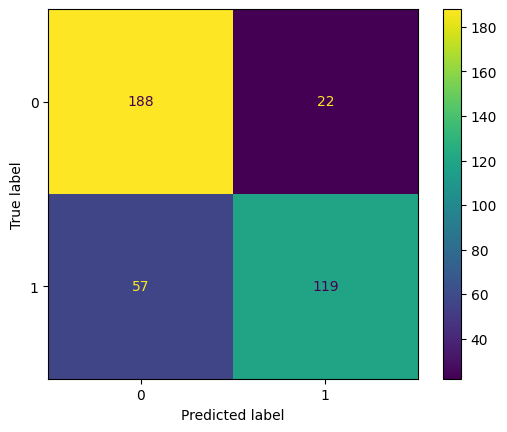

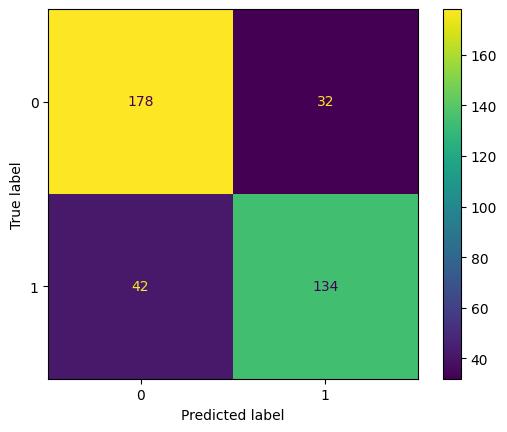

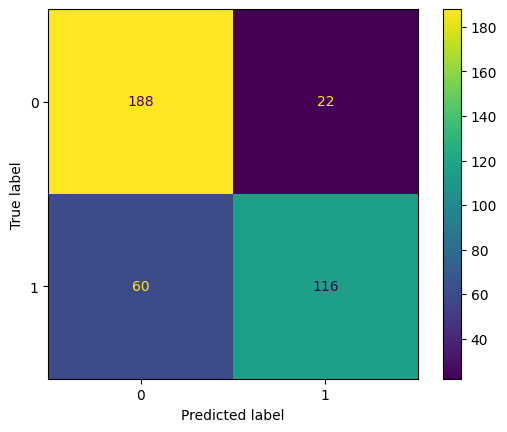

In [ ]:
prediction_on_test = decision_model.predict(predictors_test)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_model.classes_).plot()
print(classification_report(target_test, prediction_on_test))

prediction_on_test = knn_model.predict(predictors_test)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_).plot()
print(classification_report(target_test, prediction_on_test))

prediction_on_test_NB = model_NB.predict(predictors_test)
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
print(classification_report(target_test, prediction_on_test_NB))

# Results and Conclusion


The project aims with analyzing a provided dataset containing information on the voting behavior of various counties in the United States. The goal is to develop and compare three different prediction models. These models should predict whether a county will vote "yes" or "no" to legalizing gaming through a ballot.

The included variables feeded to the models are - 'FOR', 'AGAINST', 'TOTAL CASTE', 'BALLOT TYPE', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE',  'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'

The target variable is **DEPENDENT VARIABLE**.

The variable '**Percent Minority**' has the highest impact on the prediction since it has highest correlation value against the dependent variable as compared to other variables as seen in the correlation matrix.

The model is considered balanced because there isn't a big difference between how often the two different outcomes (0 and 1) occur in the data: 0 happens 739 times, and 1 happens 547 times.

When the data is imbalanced, meaning one outcome is much more common than the other, there are two main ways to fix it. One way is to make more samples for the less common outcome, and the other is to remove some data for the more common outcome until the numbers are closer to each other.

**Result:**

We will be comparing four models - Decision Tree, K Nearest Neighbour, Naive Bayes Model and K-Fold Cross Validation. We will be looking into the accuracy of each model.

**Decision Tree Model:**

This model's accuracy came to be 80% with max depth = 5.

**K Nearest Neighbour:**

This model's accuracy came to be 81% with k = 3.

**Naive Bayes Model:**

This model's accuracy came to be 79%.

**K-Fold Cross Validation:**

Accuracy of Model with Cross Validation Scores is  62.43839169909209

**Conclusion:**

In a comparison of four models for accuracy, K Nearest Neighbour (KNN) emerged victorious with 81% accuracy when using 3 neighbors (k = 3). Decision Tree followed closely behind at 80% accuracy with a maximum depth of 5, while Naive Bayes trailed at 79% accuracy.

On comparing all the models, the best suited model will be KNN as it has highest accuracy.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/ML_Assignment02.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/ML_Assignment02.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [